# Coding Exercises

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\onlin\miniconda3\envs\datavisual\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
sm_sales = pd.read_csv("supermarket_sales.csv")
sm_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Invoice ID     1000 non-null   object 
 1   Branch         1000 non-null   object 
 2   City           1000 non-null   object 
 3   Customer type  1000 non-null   object 
 4   Gender         1000 non-null   object 
 5   Product line   1000 non-null   object 
 6   Unit price     1000 non-null   float64
 7   Quantity       1000 non-null   float64
 8   Tax 5%         1000 non-null   float64
 9   Total          1000 non-null   float64
 10  Date           1000 non-null   object 
 11  Time           1000 non-null   object 
 12  Payment        1000 non-null   object 
dtypes: float64(4), object(9)
memory usage: 102.4+ KB


### Removal of Nulls

In [9]:
sm_sales.isnull().sum()

Invoice ID       0
Branch           0
City             0
Customer type    0
Gender           0
Product line     0
Unit price       0
Quantity         0
Tax 5%           0
Total            0
Date             0
Time             0
Payment          0
dtype: int64

In [36]:
sm_sales = sm_sales.dropna()
sm_sales.info()
sm_sales.head(2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 1006
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Invoice ID     1000 non-null   object 
 1   Branch         1000 non-null   object 
 2   City           1000 non-null   object 
 3   Customer type  1000 non-null   object 
 4   Gender         1000 non-null   object 
 5   Product line   1000 non-null   object 
 6   Unit price     1000 non-null   float64
 7   Quantity       1000 non-null   float64
 8   Tax 5%         1000 non-null   float64
 9   Total          1000 non-null   float64
 10  Date           1000 non-null   object 
 11  Time           1000 non-null   object 
 12  Payment        1000 non-null   object 
dtypes: float64(4), object(9)
memory usage: 109.4+ KB


Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   

             Product line  Unit price  Quantity   Tax 5%     Total  \
0       Health and beauty       74.69       7.0  26.1415  548.9715   
1  Electronic accessories       15.28       5.0   3.8200   80.2200   

         Date   Time  Payment  
0  01/05/2019  13:08  Ewallet  
1  03/08/2019  10:29     Cash

### Bar graph to display total sales by payment method and subplot for total sales by gender

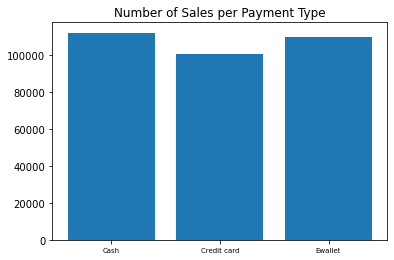

In [11]:
# First, create a dataframe for sales by payment

payment_group = sm_sales.groupby('Payment')
num_payment = payment_group.sum()['Total'].astype('int')

paymenttype = [payment for payment, df in payment_group]

plt.bar(paymenttype, num_payment)
plt.title('Number of Sales per Payment Type')
plt.xticks(paymenttype,size=7)

plt.show()

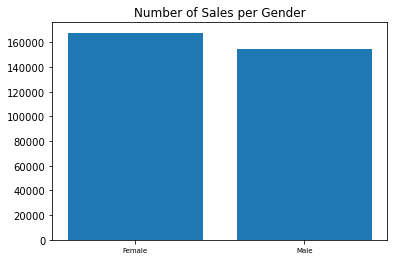

In [12]:
# Second, create a dataframe for sales by gender

gender_group = sm_sales.groupby('Gender')
num_sales = gender_group.sum()['Total'].astype('int')

eachgender =[gender for gender, df in gender_group]

plt.bar(eachgender,num_sales)
plt.title('Number of Sales per Gender')
plt.xticks(eachgender, size=7)

plt.show()

### Now, ploting the 2 graphs together

In [43]:
fig = plt.figure(figsize = (12,8))

# Graph 1

payment_group = sm_sales.groupby('Payment')
num_payment = payment_group.sum()['Total'].astype('int')

paymenttype = [payment for payment, df in payment_group]

plt.subplot(1,2,1)
plt.bar(paymenttype, num_payment, color='grey')
plt.title('USD Sales per Payment Type')
plt.xticks(paymenttype,size=7)
plt.ylim(0, 200000)

# Graph 2

gender_group = sm_sales.groupby('Gender')
num_sales = gender_group.sum()['Total'].astype('int')

eachgender =[gender for gender, df in gender_group]
plt.subplot(1,2,2)
plt.bar(eachgender,num_sales, color='grey')
plt.title('USD Sales per Gender')
plt.xticks(eachgender, size=7)
plt.ylim(0, 200000)

plt.show()

### 4.8 Coding Exercise

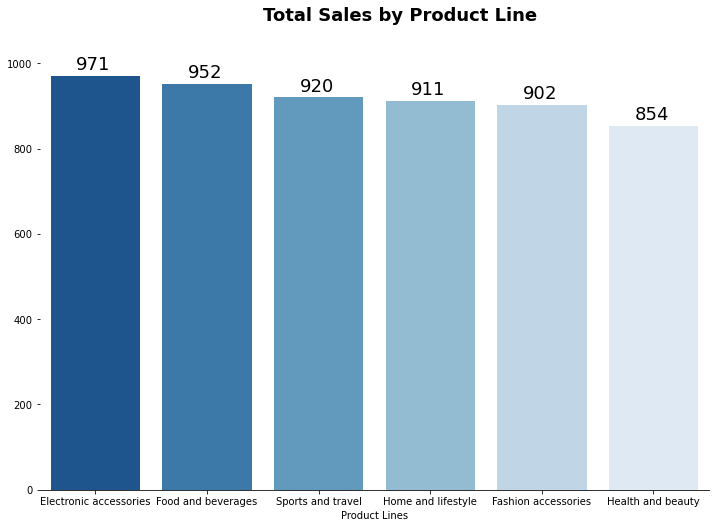

In [34]:
fig = plt.figure(figsize = (12,8))

product_line = sm_sales.groupby('Product line')
num_pl = product_line.sum()['Quantity']

sort_sum = num_pl.sort_values(ascending=False)
sort_sum = pd.DataFrame(sort_sum)
sort_sum = sort_sum.reset_index()

productline = sort_sum['Product line']
quantity_pl = sort_sum['Quantity']


g = sns.barplot(x=productline, y=quantity_pl, 
                palette ="Blues_r")
g.text(1.5, 1100, 'Total Sales by Product Line',
      fontsize=18, fontweight='bold', color='black',)
for i in['top', 'left', 'right']:
    g.spines[i].set_visible(False)
for i in g.patches:
    g.text(i.get_x()+i.get_width()/3.5,
          i.get_height()+15,
          round(i.get_height()),
           fontsize='18')
# g.set(yticklabels=[])
plt.xlabel('Product Lines')
plt.ylabel('')
plt.show()

if you want to create your own bar names
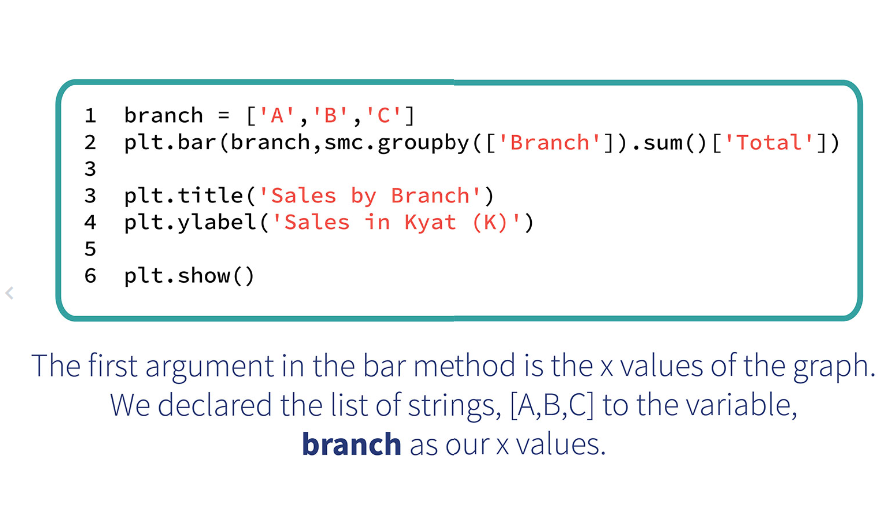